In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

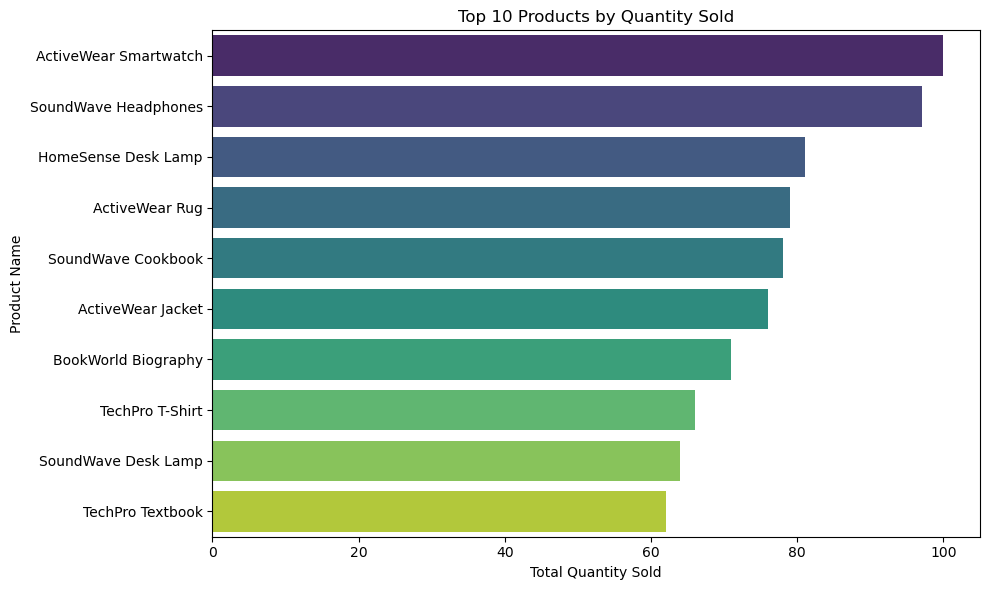

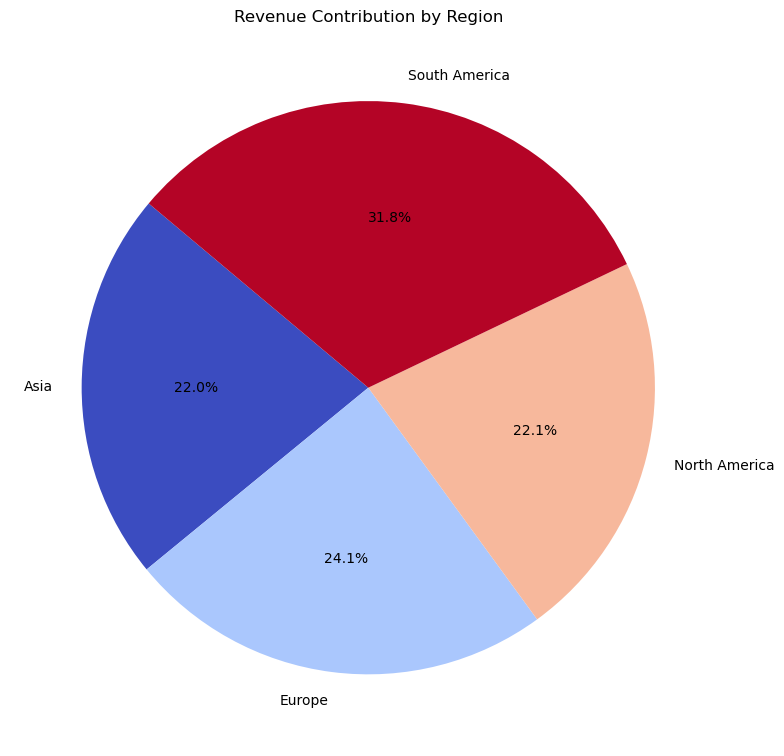

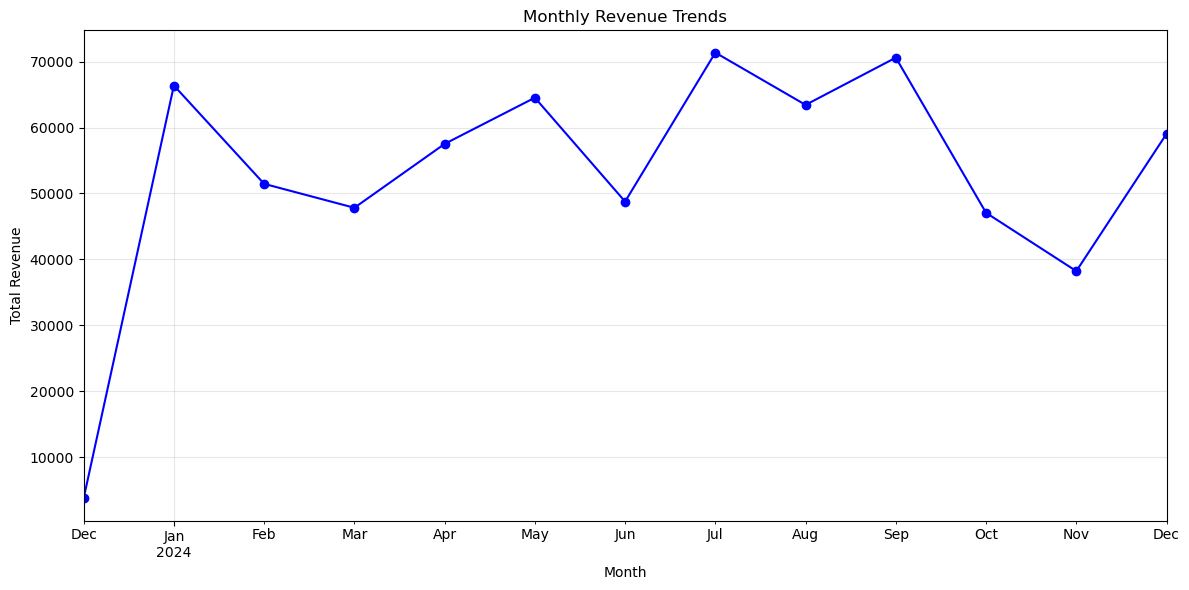

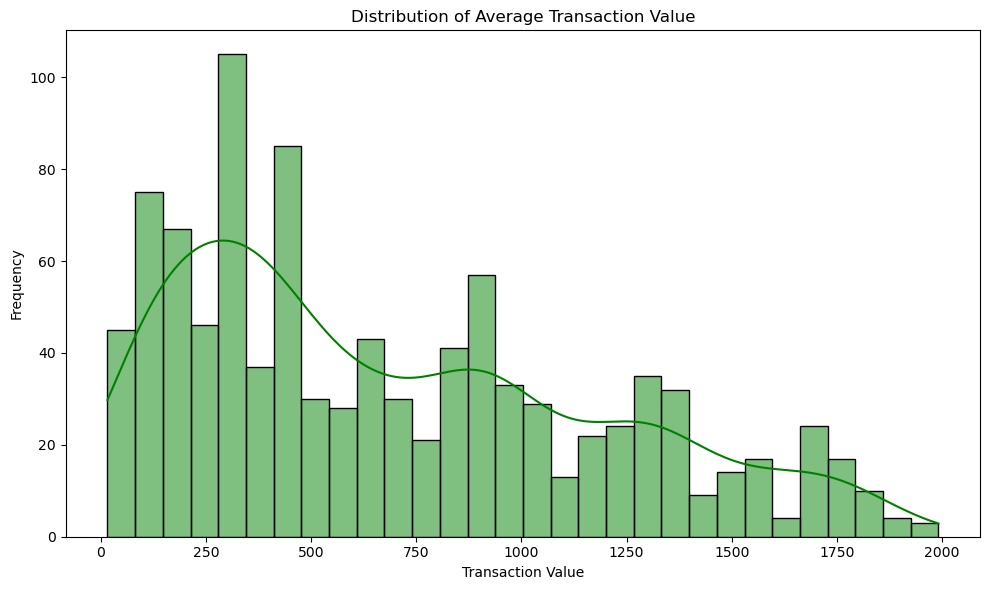

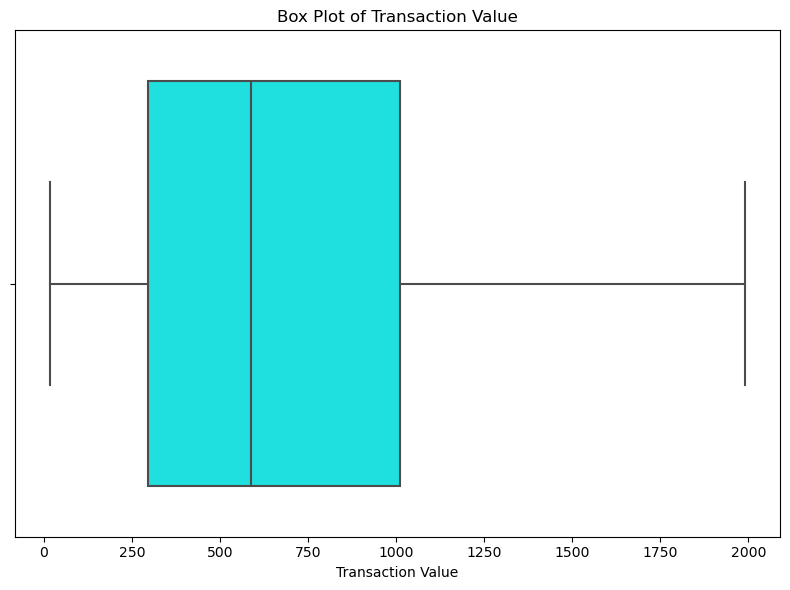

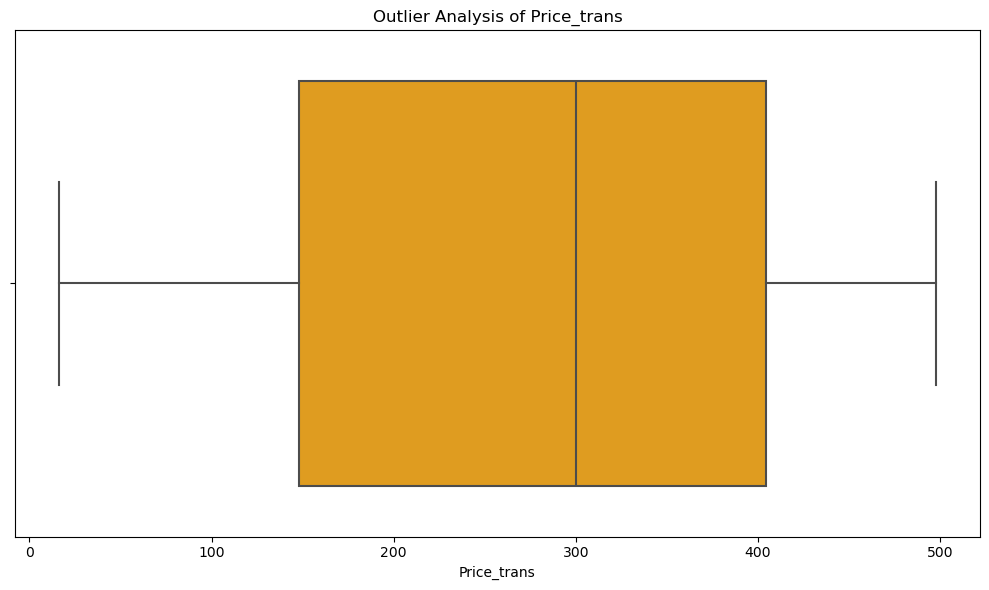

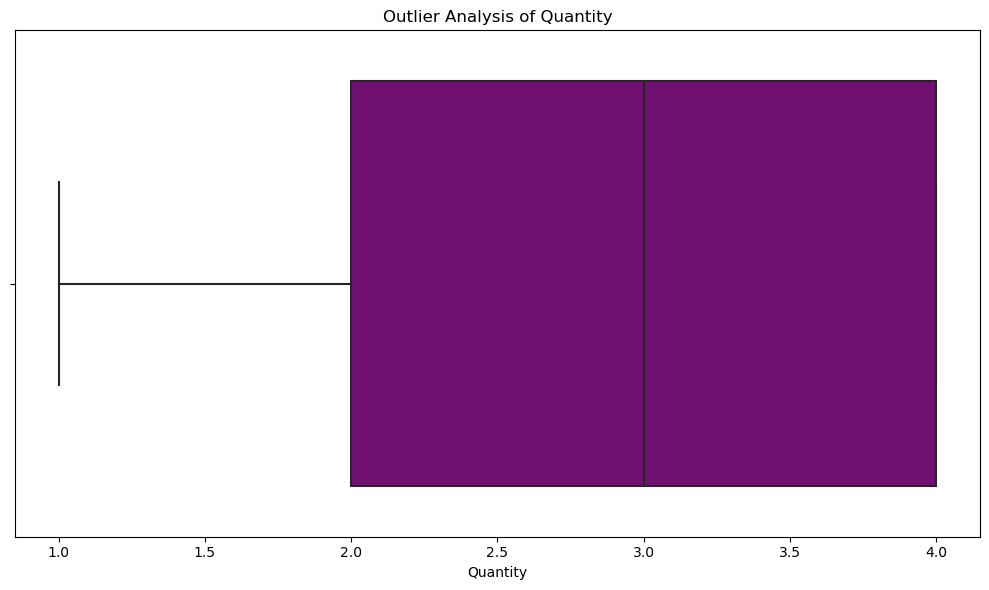

Top 10 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

Revenue Contribution by Region:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

Monthly Revenue Trends:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

Average Transaction Value:
The average transaction value is 690.00

Outlier Analysis:
Number of price outliers: 91
Numbe

In [3]:
def load_csv(file_path):
    if os.path.exists(file_path):
        return pd.read_csv(file_path)
    else:
        print(f"File not found: {file_path}")
        return None

customers = load_csv('./data/Customers.csv')
products = load_csv('./data/Products.csv')
transactions = load_csv('./data/Transactions.csv')

if customers is not None and products is not None and transactions is not None:
    try:
        transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
        transactions.dropna(subset=['TransactionDate'], inplace=True)

        data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID', suffixes=('_trans', '_prod'))

        top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
        plt.title('Top 10 Products by Quantity Sold')
        plt.xlabel('Total Quantity Sold')
        plt.ylabel('Product Name')
        plt.tight_layout()
        plt.show()

        if 'Region' in data.columns and 'TotalValue' in data.columns:
            region_revenue = data.groupby('Region')['TotalValue'].sum()
            plt.figure(figsize=(8, 8))
            region_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='coolwarm')
            plt.title('Revenue Contribution by Region')
            plt.ylabel('')
            plt.tight_layout()
            plt.show()

        if 'TotalValue' in data.columns:
            data['Month'] = data['TransactionDate'].dt.to_period('M')
            monthly_revenue = data.groupby('Month')['TotalValue'].sum()
            plt.figure(figsize=(12, 6))
            monthly_revenue.plot(kind='line', marker='o', color='b')
            plt.title('Monthly Revenue Trends')
            plt.xlabel('Month')
            plt.ylabel('Total Revenue')
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()

        plt.figure(figsize=(10, 6))
        sns.histplot(data['TotalValue'], bins=30, kde=True, color='green')
        plt.title('Distribution of Average Transaction Value')
        plt.xlabel('Transaction Value')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data['TotalValue'], color='cyan')
        plt.title('Box Plot of Transaction Value')
        plt.xlabel('Transaction Value')
        plt.tight_layout()
        plt.show()

        for col, color in zip(['Price_trans', 'Quantity'], ['orange', 'purple']):
            if col in data.columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=data[col], color=color)
                plt.title(f'Outlier Analysis of {col}')
                plt.xlabel(col)
                plt.tight_layout()
                plt.show()

        print("Top 10 Products by Quantity Sold:")
        print(top_products)

        print("\nRevenue Contribution by Region:")
        print(region_revenue)

        print("\nMonthly Revenue Trends:")
        print(monthly_revenue)

        print("\nAverage Transaction Value:")
        print(f"The average transaction value is {data['TotalValue'].mean():.2f}")

        price_outliers = data['Price_trans'][
            (data['Price_trans'] > data['Price_trans'].quantile(0.95)) |
            (data['Price_trans'] < data['Price_trans'].quantile(0.05))
        ]
        quantity_outliers = data['Quantity'][
            (data['Quantity'] > data['Quantity'].quantile(0.95)) |
            (data['Quantity'] < data['Quantity'].quantile(0.05))
        ]

        print("\nOutlier Analysis:")
        print(f"Number of price outliers: {len(price_outliers)}")
        print(f"Number of quantity outliers: {len(quantity_outliers)}")

    except KeyError as e:
        print(f"Error during processing: {e}")
else:
    print("Ensure all required files are present in the 'data' folder.")
